In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
model = Sequential([
    Conv2D(16, kernel_size=3, strides=(2,2), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 37,738
Trainable params: 37,738
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = train_images / 255
test_images = test_images / 255

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

Ankle boot


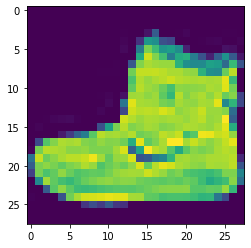

In [11]:
plt.imshow(train_images[0])
print(labels[train_labels[0]])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.MeanAbsoluteError()]
             )

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 37,738
Trainable params: 37,738
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4758 - sparse_categorical_accuracy: 0.8264 - mean_absolute_error: 4.4200
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3513 - sparse_categorical_accuracy: 0.8703 - mean_absolute_error: 4.4200
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.8805 - mean_absolute_error: 4.4200
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2977 - sparse_categorical_accuracy: 0.8870 - mean_absolute_error: 4.4200
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - sparse_categorical_accuracy: 0.8949 - mean_absolute_error: 4.4200
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - sparse_categorical_accuracy: 0.8986 - mean_absolute_error: 4.4200
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2556 - sparse_ca

In [15]:
df = pd.DataFrame(history.history)

In [16]:
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.475756,0.826400,4.420010
1,0.351348,0.870267,4.420004
2,0.319061,0.880517,4.420011
3,0.297707,0.886983,4.420004
4,0.281917,0.894850,4.420010


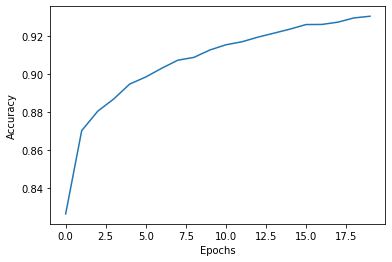

In [17]:
plt.plot(df['sparse_categorical_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.show()

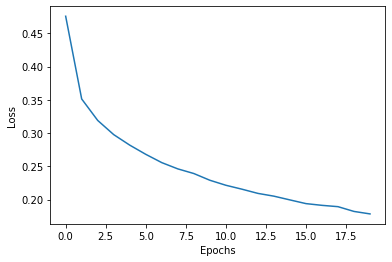

In [19]:
plt.plot(df['loss'].astype('float64'))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [22]:
loss, sparse_accuracy,mse = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.8791 - mean_absolute_error: 4.4200


0.4395844638347626